In [4]:
 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math

 

 
 

In [5]:
#Lets read the data 
data=pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Candidates info- 2019 elections EDA\LS_2.0.csv")
data.head()


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [6]:
# converting column names
data.columns=data.columns.str.strip().str.lower().str.replace('\n','_')
data.columns


Index(['state', 'constituency', 'name', 'winner', 'party', 'symbol', 'gender',
       'criminal_cases', 'age', 'category', 'education', 'assets',
       'liabilities', 'general_votes', 'postal_votes', 'total_votes',
       'over total electors _in constituency',
       'over total votes polled _in constituency', 'total electors'],
      dtype='object')

In [7]:
# Lets find missing values in dataset
data.isnull().sum()


state                                         0
constituency                                  0
name                                          0
winner                                        0
party                                         0
symbol                                      245
gender                                      245
criminal_cases                              245
age                                         245
category                                    245
education                                   245
assets                                      245
liabilities                                 245
general_votes                                 0
postal_votes                                  0
total_votes                                   0
over total electors _in constituency          0
over total votes polled _in constituency      0
total electors                                0
dtype: int64

In [8]:
data.shape

(2263, 19)

In [9]:
# Lets analyse the age of candidates
data['age'].describe()


count    2018.000000
mean       52.273538
std        11.869373
min        25.000000
25%        43.250000
50%        52.000000
75%        61.000000
max        86.000000
Name: age, dtype: float64

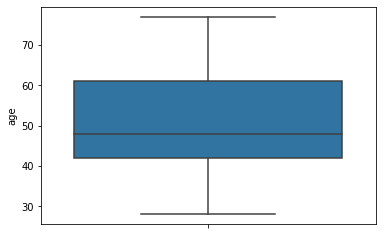

In [10]:
sns.boxplot(data=data['age'],y=data['age'])
plt.show()

In [11]:
# Let's analyze education qualification of candidates
data['education'][data['education']=='Post Graduate\n']='Post Graduate'

# Assuming NAs as Illiterate
data['education'].fillna('Illiterate',inplace=True)
data['education'][data['education']=='Not Available']='Illiterate'
data.groupby('education',as_index=False)['name'].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,education,name
0,10th Pass,196
1,12th Pass,256
2,5th Pass,28
3,8th Pass,78
4,Doctorate,73
5,Graduate,441
6,Graduate Professional,336
7,Illiterate,272
8,Literate,30
9,Others,50


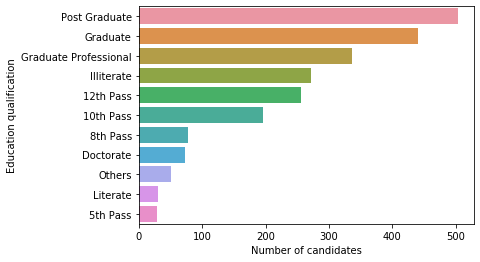

In [12]:
education=data.groupby('education',as_index=False)['name'].count()
education=education.sort_values(by='name',ascending=False)
sns.barplot(y=education['education'],x=education['name'])
plt.xlabel('Number of candidates')
plt.ylabel('Education qualification')
plt.show()

In [13]:
# Lets focus on candidates who won 
won_mps=data[data['winner']==1]
won_mps.shape

(539, 19)

In [14]:
# Top 15 MP's with criminal cases
won_mps.criminal_cases=won_mps['criminal_cases'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


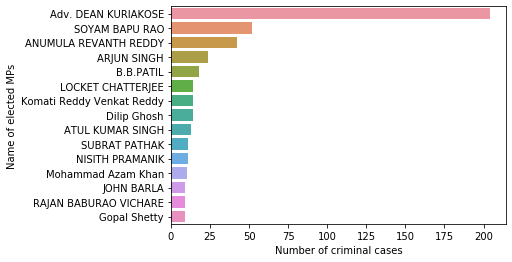

In [15]:
crim_mps=won_mps[won_mps.criminal_cases>=1]
top_crims=crim_mps.sort_values(['criminal_cases'],ascending=False)[:15]
sns.barplot(y=top_crims['name'],x=top_crims['criminal_cases'])
plt.xlabel('Number of criminal cases')
plt.ylabel('Name of elected MPs')
plt.show()

In [16]:
# Karnataka MPs
won_mps_kar=won_mps[won_mps['state']=='Karnataka']

In [17]:
#Top 10 Karnataka MPs who bagged highest percentage of votes in their constituency
won_mps_kar[['name','constituency','over total votes polled _in constituency']].sort_values(by='over total votes polled _in constituency',ascending=False)[:10]

,name,constituency,over total votes polled _in constituency
2175,ANANTKUMAR HEGDE,UTTARA KANNADA,68.091546
356,ANGADI SURESH CHANNABASAPPA,BELGAUM,63.123560
2154,SHOBHA KARANDLAJE,UDUPI CHIKMAGALUR,62.426332
243,TEJASVI SURYA,BANGALORE SOUTH,62.137994
586,NALIN KUMAR KATEEL,DAKSHINA KANNADA,57.552810
422,JIGAJINAGI RAMESH CHANDAPPA,BIJAPUR,57.156944
1917,B.Y.RAGHAVENDRA.,SHIMOGA,56.840648
630,Pralhad Joshi,DHARWAD,56.405203
1194,S. MUNISWAMY,KOLAR,56.323480
195,Gaddigoudar Parvatagouda Chandanagouda,BAGALKOT,55.170324


In [18]:
# Top 5 oldest MPs in Karnataka
won_mps_kar[['name','age','constituency']].sort_values(by='age',ascending=False)[:5]


,name,age,constituency
2136,G. S. BASAVARAJ,78.0,TUMKUR
535,B.N.Bache Gowda,76.0,CHIKKBALLAPUR
472,V. SRINIVAS PRASAD,71.0,CHAMARAJANAGAR
195,Gaddigoudar Parvatagouda Chandanagouda,68.0,BAGALKOT
358,Y. DEVENDRAPPA,67.0,BELLARY


In [19]:
# Top 20 youngest MPs across India
top25=won_mps.sort_values(by='age',ascending=True)[:20]
top25[['state','name','age','party','gender']]

,state,name,age,party,gender
138,Andhra Pradesh,GODDETI. MADHAVI,26.0,YSRCP,FEMALE
326,West Bengal,Nusrat Jahan Ruhi,28.0,AITC,FEMALE
243,Karnataka,TEJASVI SURYA,28.0,BJP,MALE
853,Karnataka,PRAJWAL REVANNA,28.0,JD(S),MALE
916,West Bengal,MIMI CHAKRABORTY,30.0,AITC,FEMALE
1866,Uttar Pradesh,PRAVEEN KUMAR NISHAD,30.0,BJP,MALE
1942,Sikkim,INDRA HANG SUBBA,30.0,SKM,MALE
645,West Bengal,ABHISHEK BANERJEE,31.0,AITC,MALE
1806,Maharashtra,Khadse Raksha Nikhil,31.0,BJP,FEMALE
1543,Maharashtra,Dr. Heena Vijaykumar Gavit,31.0,BJP,FEMALE


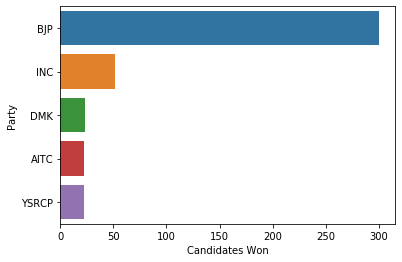

In [20]:
# Top 5 indian political parties as per 2019 elections
party_wise_win=won_mps.groupby('party',as_index=False)['name'].count().sort_values('name',ascending=False)[:5]
sns.barplot(x=party_wise_win['name'],y=party_wise_win['party'])
plt.xlabel('Candidates Won')
plt.ylabel('Party')
plt.show()